In [17]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [18]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [19]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [20]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [21]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine)

In [22]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [23]:
# Save references to each table
M = Base.classes.measurement
S = Base.classes.station

In [24]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [54]:
# Find the most recent date in the data set.
# session.query(M.date).all()[-1]
lastDate = session.query(M.date).order_by(M.date.desc()).first()
print(lastDate)
lastDate = lastDate[0]

('2017-08-23',)


<Axes: xlabel='Date', ylabel='Inches'>

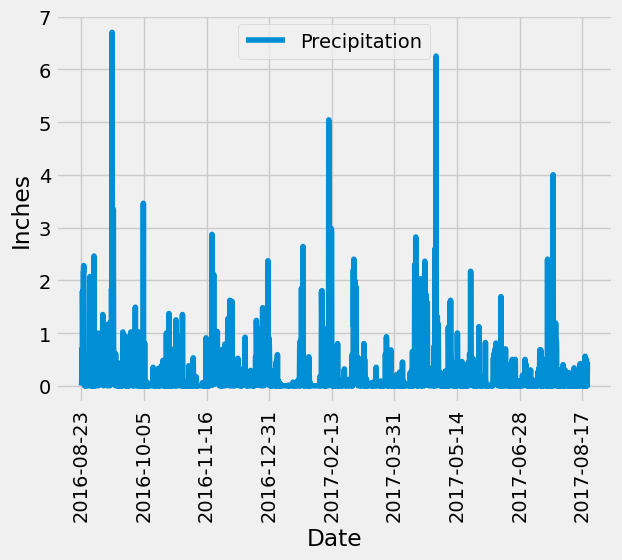

In [77]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
preYear = dt.datetime.strptime(lastDate, '%Y-%m-%d').date() - dt.timedelta(365)

# Perform a query to retrieve the date and precipitation scores
results = session.query(M.date, M.prcp).filter(M.date>=preYear).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
DF = pd.DataFrame(results, columns=['Date', 'Precipitation']).dropna()

# Sort the dataframe by date
DF = DF.sort_values('Date').set_index('Date')

# Use Pandas Plotting with Matplotlib to plot the data
DF.plot(rot=90, ylabel='Inches')
DF.describe()

In [79]:
# Use Pandas to calculate the summary statistics for the precipitation data
DF.describe()


,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [91]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(S.station)).all()

[(9,)]

In [108]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
sel = [M.station, func.count(M.station)]
mAs = session.query(*sel).group_by(sel[0]).order_by(sel[1].desc()).all()
mAs

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [112]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [func.min(M.tobs), func.max(M.tobs), func.avg(M.tobs)]
session.query(*sel).filter(M.station==mAs[0][0]).all()


[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 0, 'Temperature')

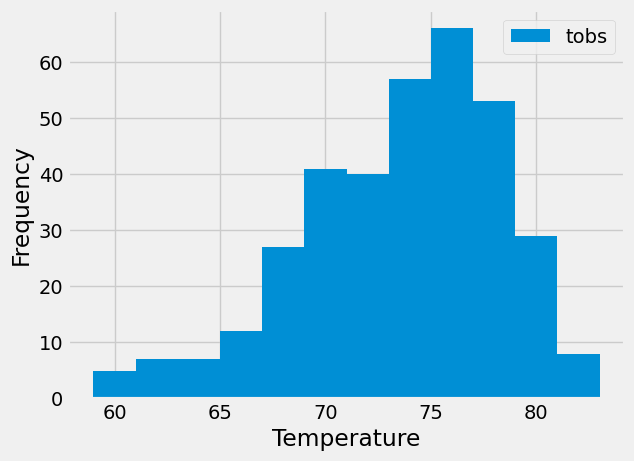

In [147]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(M.tobs).filter((M.date>=preYear)&(M.station==mAs[0][0])).all()

plot = pd.DataFrame(results).tobs.hist(bins=12, legend=True)
plot.set_ylabel('Frequency')
plot.set_xlabel('Temperature')

# Close Session

In [148]:
# Close Session
session.close()